<a href="https://colab.research.google.com/github/abharathkumarr/CS276/blob/main/Code/Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity 2 Part 1 use the grakel library for WL and svmgraph classification on the MUTAG dataset (https://networkrepository.com/Mutag.php)**

Help in
https://ysig.github.io/GraKeL/0.1a8/auto_examples/weisfeiler_lehman_subtree.html#sphx-glr-auto-examples-weisfeiler-lehman-subtree-py


In [ ]:
import os
os.chdir("/content/MUTAG")
from sklearn.utils import Bunch

%pip install grakel
from grakel.graph import Graph
def read_data(
        name,
        with_classes=True,
        prefer_attr_nodes=False,
        prefer_attr_edges=False,
        produce_labels_nodes=False,
        as_graphs=False,
        is_symmetric=False):

    indicator_path = str(name)+"_graph_indicator.txt"
    edges_path = str(name) + "_A.txt"
    node_labels_path = str(name) + "_node_labels.txt"
    node_attributes_path = str(name)+"_node_attributes.txt"
    edge_labels_path = str(name) + "_edge_labels.txt"
    edge_attributes_path = str(name) + "_edge_attributes.txt"
    graph_classes_path = str(name) + "_graph_labels.txt"

    print("TEST" + indicator_path)
    # node graph correspondence
    ngc = dict()
    # edge line correspondence
    elc = dict()
    # dictionary that keeps sets of edges
    Graphs = dict()
    # dictionary of labels for nodes
    node_labels = dict()
    # dictionary of labels for edges
    edge_labels = dict()

    # Associate graphs nodes with indexes
    with open(indicator_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            ngc[i] = int(line[:-1])
            if int(line[:-1]) not in Graphs:
                Graphs[int(line[:-1])] = set()
            if int(line[:-1]) not in node_labels:
                node_labels[int(line[:-1])] = dict()
            if int(line[:-1]) not in edge_labels:
                edge_labels[int(line[:-1])] = dict()

    # Extract graph edges
    with open(edges_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            edge = line[:-1].replace(' ', '').split(",")
            elc[i] = (int(edge[0]), int(edge[1]))
            Graphs[ngc[int(edge[0])]].add((int(edge[0]), int(edge[1])))
            if is_symmetric:
                Graphs[ngc[int(edge[1])]].add((int(edge[1]), int(edge[0])))


    # Extract node attributes

    with open(node_labels_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            node_labels[ngc[i]][i] = int(line[:-1])


    # Extract edge attributes

    with open(edge_labels_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            edge_labels[ngc[elc[i][0]]][elc[i]] = int(line[:-1])
            if is_symmetric:
                edge_labels[ngc[elc[i][1]]][(elc[i][1], elc[i][0])] = \
                    int(line[:-1])

    Gs = list()
    if as_graphs:
        for i in range(1, len(Graphs)+1):
            Gs.append(Graph(Graphs[i], node_labels[i], edge_labels[i]))
    else:
        for i in range(1, len(Graphs)+1):
            Gs.append([Graphs[i], node_labels[i], edge_labels[i]])

    if with_classes:
        classes = []
        with open(graph_classes_path, "r") as f:
            for line in f:
                classes.append(int(line[:-1]))

        classes = np.array(classes, dtype=int)
        return Bunch(data=Gs, target=classes)
    else:
        return Bunch(data=Gs)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# from grakel.datasets import fetch_dataset, read_data
from grakel.kernels import WeisfeilerLehman, VertexHistogram

# Loads the MUTAG dataset
#add here
# Loads the MUTAG dataset
MUTAG = read_data("MUTAG")
G, y = MUTAG.data, MUTAG.target

# Splits the dataset into a training and a test set
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

# Uses the Weisfeiler-Lehman subtree kernel to generate the kernel matrices
gk = WeisfeilerLehman(n_iter=4, base_graph_kernel=VertexHistogram, normalize=True)
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

# Uses the SVM classifier to perform classification
#add here
# Uses the SVM classifier to perform classification
svm_classifier = SVC(kernel='precomputed')
svm_classifier.fit(K_train, y_train)

# Predicts labels for the test set
y_pred = svm_classifier.predict(K_test)

# Computes and prints the classification accuracy
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", str(round(acc*100, 2)) + "%")
print("Percision:", str(round(prec*100, 2)) + "%")
print("Recall:", str(round(rec*100, 2)) + "%")
print("F1:", str(round(f1*100, 2)) + "%")

TESTMUTAG_graph_indicator.txt
Accuracy: 89.47%
Percision: 91.67%
Recall: 91.67%
F1: 91.67%


New Dataset: PROTEINS

In [ ]:
import os
os.chdir("/content/PROTEINS")
from sklearn.utils import Bunch

%pip install grakel
from grakel.graph import Graph
def read_data(
        name,
        with_classes=True,
        prefer_attr_nodes=False,
        prefer_attr_edges=False,
        produce_labels_nodes=False,
        as_graphs=False,
        is_symmetric=False):

    indicator_path = str(name)+"_graph_indicator.txt"
    edges_path = str(name) + "_A.txt"
    node_labels_path = str(name) + "_node_labels.txt"
    node_attributes_path = str(name)+"_node_attributes.txt"
    # edge_labels_path = str(name) + "_edge_labels.txt"
    # edge_attributes_path = str(name) + "_edge_attributes.txt"
    graph_classes_path = str(name) + "_graph_labels.txt"

    print("TEST" + indicator_path)
    # node graph correspondence
    ngc = dict()
    # edge line correspondence
    elc = dict()
    # dictionary that keeps sets of edges
    Graphs = dict()
    # dictionary of labels for nodes
    node_labels = dict()
    # dictionary of labels for edges
    edge_labels = dict()

    # Associate graphs nodes with indexes
    with open(indicator_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            ngc[i] = int(line[:-1])
            if int(line[:-1]) not in Graphs:
                Graphs[int(line[:-1])] = set()
            if int(line[:-1]) not in node_labels:
                node_labels[int(line[:-1])] = dict()
            if int(line[:-1]) not in edge_labels:
                edge_labels[int(line[:-1])] = dict()

    # Extract graph edges
    with open(edges_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            edge = line[:-1].replace(' ', '').split(",")
            elc[i] = (int(edge[0]), int(edge[1]))
            Graphs[ngc[int(edge[0])]].add((int(edge[0]), int(edge[1])))
            if is_symmetric:
                Graphs[ngc[int(edge[1])]].add((int(edge[1]), int(edge[0])))


    # Extract node attributes

    with open(node_labels_path, "r") as f:
        for (i, line) in enumerate(f, 1):
            node_labels[ngc[i]][i] = int(line[:-1])


    # Extract edge attributes

    # with open(edge_labels_path, "r") as f:
    #     for (i, line) in enumerate(f, 1):
    #         edge_labels[ngc[elc[i][0]]][elc[i]] = int(line[:-1])
    #         if is_symmetric:
    #             edge_labels[ngc[elc[i][1]]][(elc[i][1], elc[i][0])] = \
    #                 int(line[:-1])

    Gs = list()
    if as_graphs:
        for i in range(1, len(Graphs)+1):
            Gs.append(Graph(Graphs[i], node_labels[i], edge_labels[i]))
    else:
        for i in range(1, len(Graphs)+1):
            Gs.append([Graphs[i], node_labels[i], edge_labels[i]])

    if with_classes:
        classes = []
        with open(graph_classes_path, "r") as f:
            for line in f:
                classes.append(int(line[:-1]))

        classes = np.array(classes, dtype=int)
        return Bunch(data=Gs, target=classes)
    else:
        return Bunch(data=Gs)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# from grakel.datasets import fetch_dataset, read_data
from grakel.kernels import WeisfeilerLehman, VertexHistogram

# Loads the MUTAG dataset
#add here
# Loads the MUTAG dataset
MUTAG = read_data("PROTEINS")
G, y = MUTAG.data, MUTAG.target

# Splits the dataset into a training and a test set
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

# Uses the Weisfeiler-Lehman subtree kernel to generate the kernel matrices
gk = WeisfeilerLehman(n_iter=4, base_graph_kernel=VertexHistogram, normalize=True)
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

# Uses the SVM classifier to perform classification
#add here
# Uses the SVM classifier to perform classification
svm_classifier = SVC(kernel='precomputed')
svm_classifier.fit(K_train, y_train)

# Predicts labels for the test set
y_pred = svm_classifier.predict(K_test)

# Computes and prints the classification accuracy
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", str(round(acc*100, 2)) + "%")
print("Percision:", str(round(prec*100, 2)) + "%")
print("Recall:", str(round(rec*100, 2)) + "%")
print("F1:", str(round(f1*100, 2)) + "%")

TESTPROTEINS_graph_indicator.txt
Accuracy: 76.79%
Percision: 76.32%
Recall: 87.88%
F1: 81.69%


**Activity Part 2**

In [1]:
import os
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import random


default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

Link Prediction metrics

In [2]:
#use this for colab
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-79bkme7x
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-79bkme7x
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=48ce7d3ddd8445174ff5a4638995792733032526c553e1ef4b639638f30ad27b
  Stored in directory: /tmp/pip-ephem-wheel-cache-vnr3orjq/wheels/0b/86/26/0e9067e017ec9251ff381d94af21d27cdc60ffbb75faa400f2
Successfully built stellargraph


In [3]:
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz
!gzip -d facebook_combined.txt.gz


--2025-03-15 01:41:46--  http://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   867KB/s    in 0.2s    

2025-03-15 01:41:47 (867 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]



In [4]:
!ls

facebook_combined.txt  sample_data


In [7]:
import networkx as nx

G = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph has 4039 nodes and 88234 edges.


Use Spring Layout to calculate node positions.


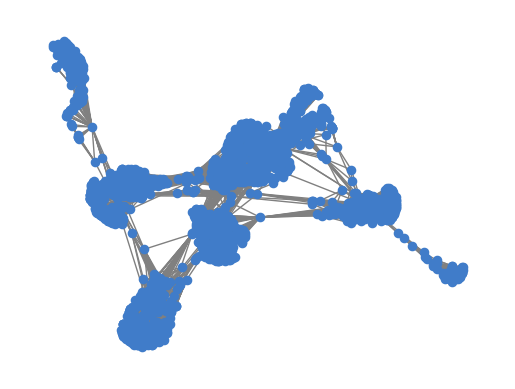

In [8]:
spring_pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, node_color=default_node_color, edge_color=default_edge_color, with_labels=False, node_size=35)


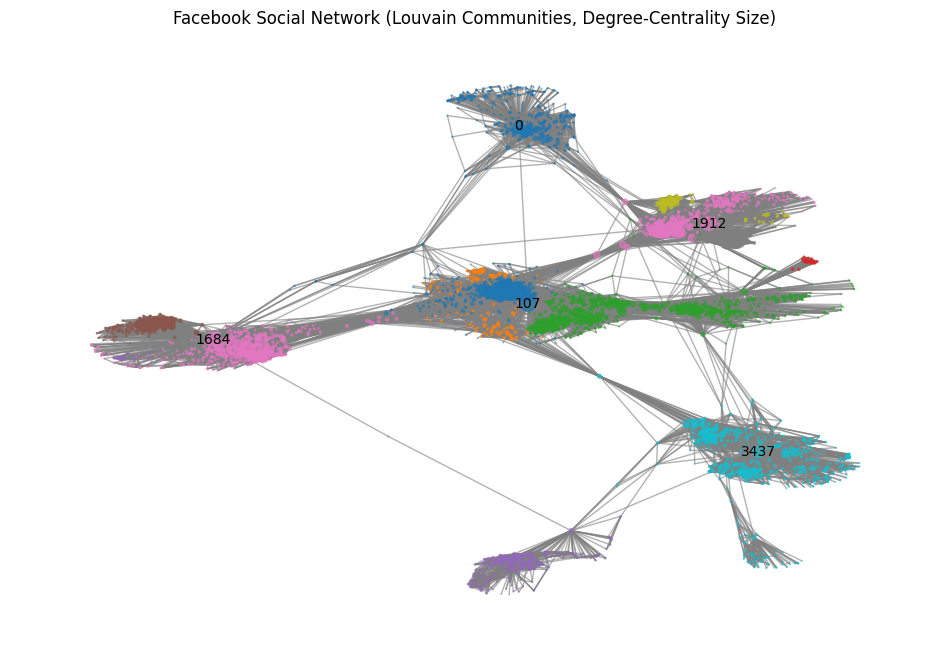

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

pos = nx.spring_layout(G, seed=42)

degree_centrality = nx.degree_centrality(G)
node_sizes = [500 * degree_centrality[node] for node in G.nodes()]

communities = nx_comm.louvain_communities(G, seed=42)
community_colors = {node: i for i, comm in enumerate(communities) for node in comm}

node_colors = [community_colors[node] for node in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw_networkx(
    G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.tab10,
    edge_color="gray", alpha=0.6, with_labels=False
)

top_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]
top_node_labels = {node: str(node) for node, _ in top_nodes}

nx.draw_networkx_labels(G, pos, labels=top_node_labels, font_size=10, font_color="black")

plt.title("Facebook Social Network (Louvain Communities, Degree-Centrality Size)")
plt.axis("off")
plt.show()


*#The graph visualizes the Facebook network using Louvain community detection (colors) and degree centrality (node sizes). Larger nodes represent highly connected individuals (hubs), while different colors indicate friendship clusters.*



In [19]:
from sklearn.model_selection import train_test_split
from stellargraph.data import EdgeSplitter
from stellargraph import StellarGraph

edgeSplitter = EdgeSplitter(G)
graph_test, samples_test, labels_test = edgeSplitter.train_test_split(p=0.1, method="global", seed=24)

edgeSplitter = EdgeSplitter(graph_test, G)
graph_train, samples_train, labels_train = edgeSplitter.train_test_split(p=0.1, method="global", seed=24)

** Sampled 8823 positive and 8823 negative edges. **
** Sampled 7941 positive and 7941 negative edges. **


In [18]:
print("Training Labels Distribution:", np.bincount(labels_train))
print("Testing Labels Distribution:", np.bincount(labels_test))

Training Labels Distribution: [7941 7941]
Testing Labels Distribution: [8823 8823]


In [20]:
import numpy as np

# Print label distribution to check if we have both 0s and 1s
print("Training Labels Distribution:", np.bincount(labels_train))
print("Testing Labels Distribution:", np.bincount(labels_test))


Training Labels Distribution: [7941 7941]
Testing Labels Distribution: [8823 8823]


Hand crafted features

In [26]:

import networkx.algorithms.community as nx_comm

def get_shortest_path(G,u,v):
  """ Return the shortest path length between u,v in the graph without the edge (u,v). """
  removed = False
  if G.has_edge(u,v):
    removed = True
    G.remove_edge(u,v)

  try:
    sp = len(nx.shortest_path(G, u, v))
  except:
    sp = 0

  if removed:
    G.add_edge(u,v)

  return sp

def get_hc_features(G, samples_edges, labels):
  centralities = nx.degree_centrality(G)
  parts = nx_comm.louvain_communities(G, seed=123)

  feats = []
  for (u,v),l in zip(samples_edges, labels):
    shortest_path = get_shortest_path(G, u, v)
    j_coefficient = next(nx.jaccard_coefficient(G, ebunch=[(u, v)]))[-1]
    a_coefficient = next(nx.adamic_adar_index(G, ebunch=[(u, v)]))[-1]
    u_centrality = centralities[u]
    v_centrality = centralities[v]


    feats.append([shortest_path, j_coefficient, a_coefficient, u_centrality, v_centrality])

  return feats

feat_train = get_hc_features(graph_train, samples_train, labels_train)
feat_test = get_hc_features(graph_test, samples_test, labels_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=10)
rf.fit(feat_train, labels_train)

y_pred = rf.predict(feat_test)

print('Precision:', metrics.precision_score(labels_test, y_pred))
print('Recall:', metrics.recall_score(labels_test, y_pred))
print('F1-Score:', metrics.f1_score(labels_test, y_pred))


Precision: 0.969111535437493
Recall: 0.9778986739204353
F1-Score: 0.9734852758659596


Visualizing Feature Importance

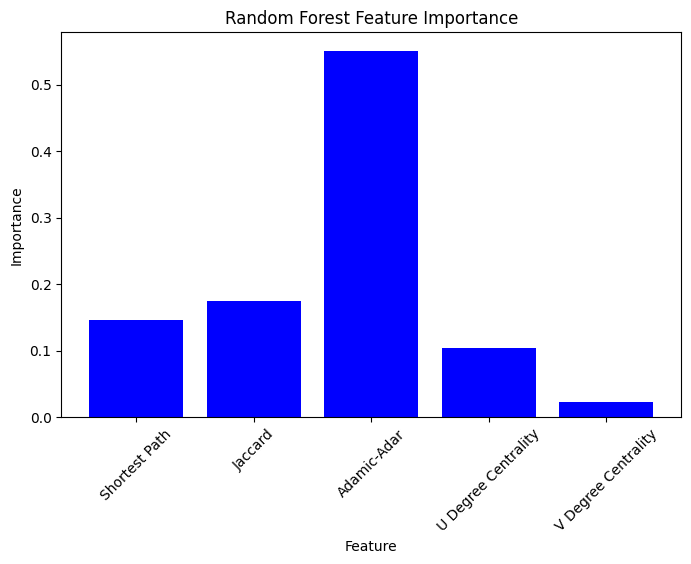

In [27]:
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
importances = rf.feature_importances_
features = ["Shortest Path", "Jaccard", "Adamic-Adar", "U Degree Centrality", "V Degree Centrality"]

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(features, importances, color="blue")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.show()
